In [24]:
!pip install deepface opencv-python

In [25]:
import cv2
from deepface import DeepFace
# Import the necessary function for displaying images in Colab
from google.colab.patches import cv2_imshow


24-10-20 10:49:01 - Directory /root/.deepface has been created
24-10-20 10:49:01 - Directory /root/.deepface/weights has been created


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
!pip install opencv-python-headless deepface


In [1]:
!pip uninstall opencv-python
!pip install opencv-python

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_python-4.10.0.84.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Core-e6d3f451.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Gui-5dea4132.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Test-d435aae7.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Widgets-e392eaf8.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5XcbQpa-3bf8a55a.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libX11-xcb-0e257303.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libavcodec-9aae324f.so.59.37.100
    /usr/loca

In [30]:
pip install opencv-python-headless tensorflow numpy


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


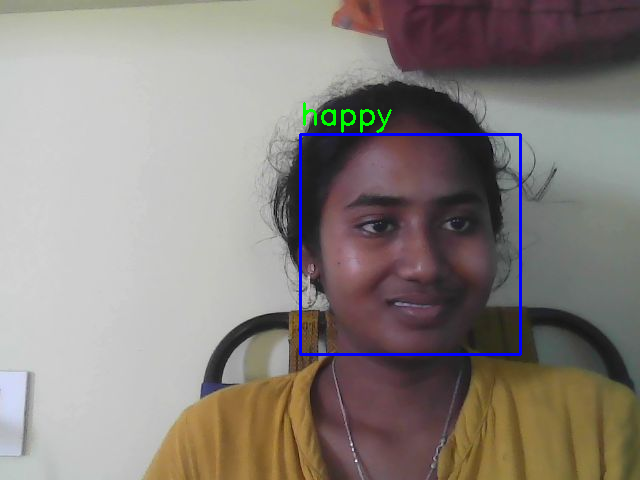

In [21]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
for (x, y, w, h) in faces:
    face_image = gray[y:y+h, x:x+w]
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)  # Draw rectangle around face

    # Resize the face image to match model input (48x48)
    face_image = cv2.resize(face_image, (48, 48))
    face_image = face_image.reshape(1, 48, 48, 1)

    # Normalize the image
    face_image = face_image / 255.0

    # Make prediction
    pred = model.predict(face_image)
    prediction_label = labels[pred.argmax()]

    # Display the prediction label on the image
    cv2.putText(img, prediction_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Show the final image with predictions
cv2_imshow(img)


Exception in thread Thread-21 (capture_frames):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-48-4fd9aca4e9d9>", line 72, in capture_frames
cv2.error: OpenCV(4.10.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:1134: error: (-215:Assertion failed) !image.empty() in function 'imencode'



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step



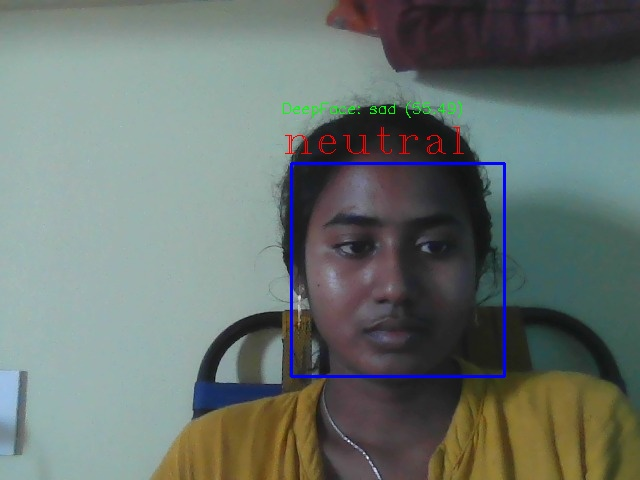

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step



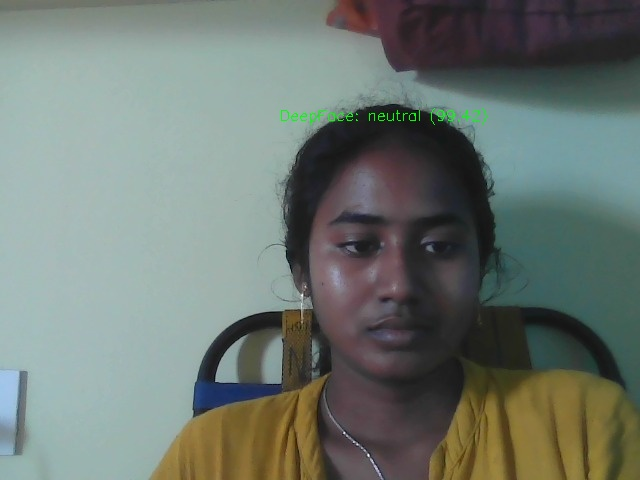

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step



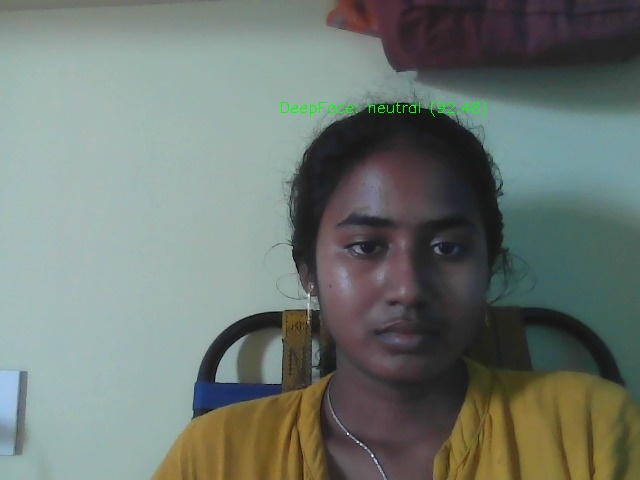


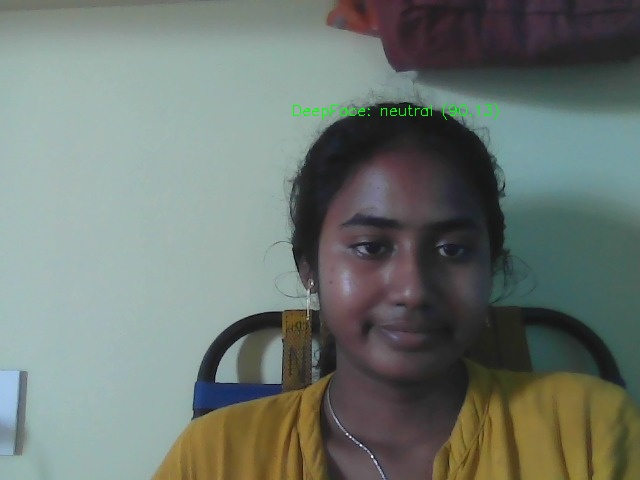

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step



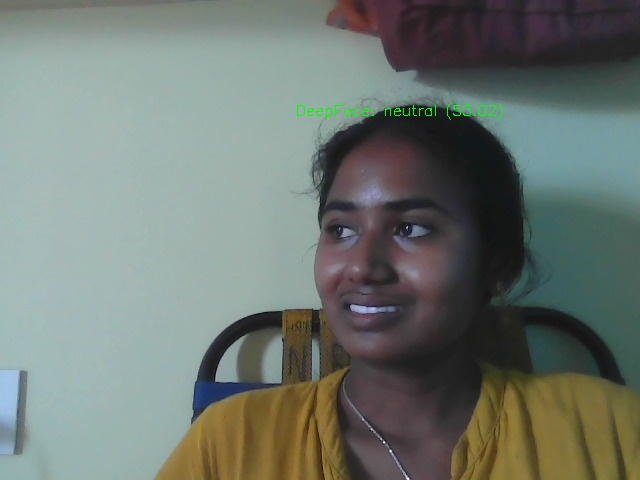

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step



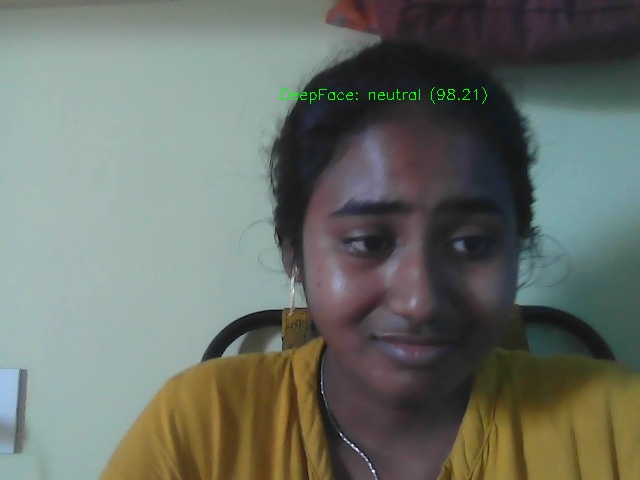

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step



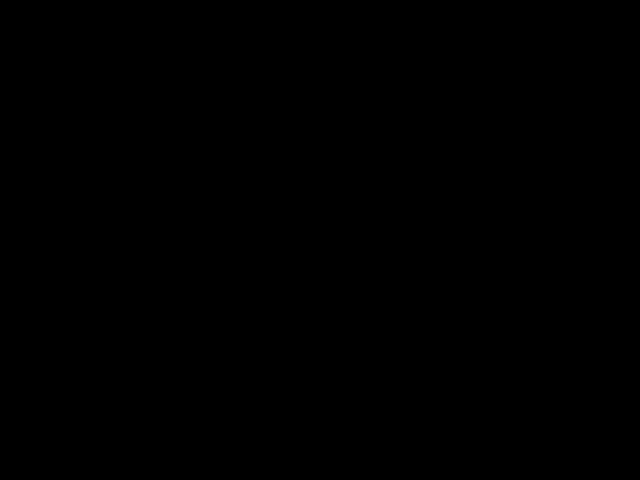


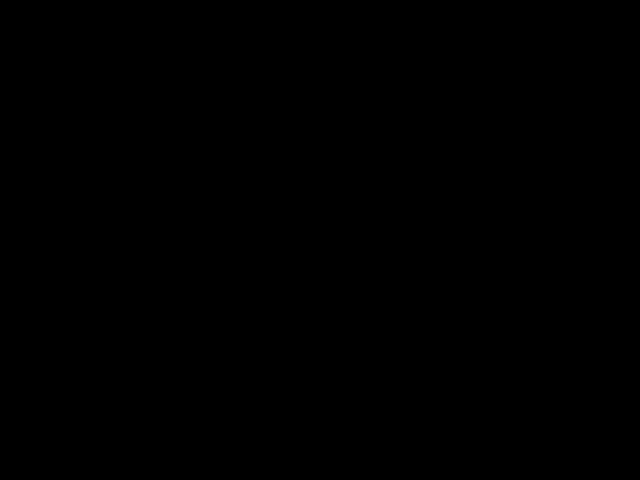


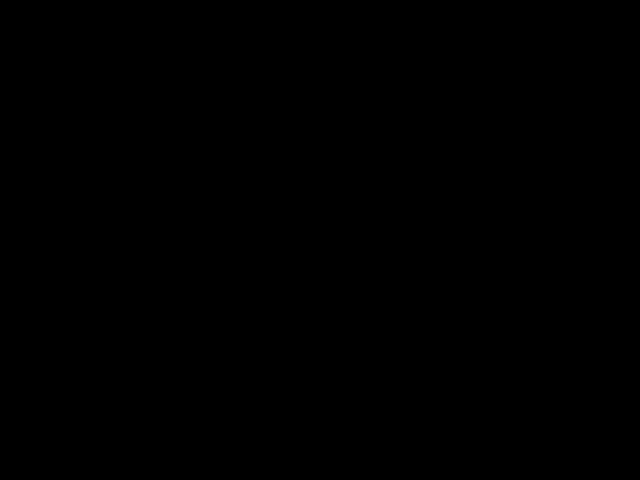


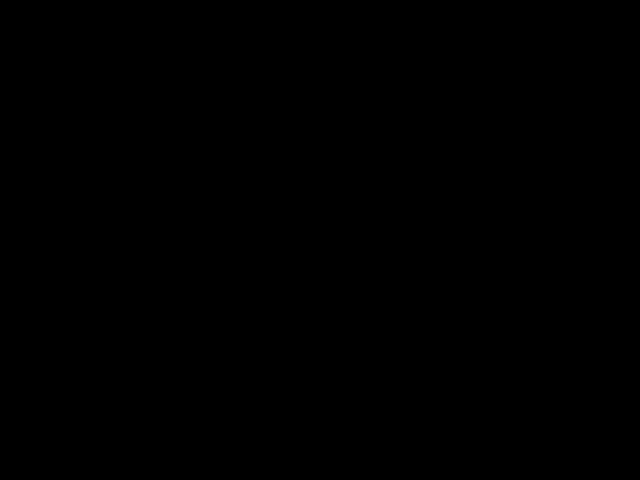


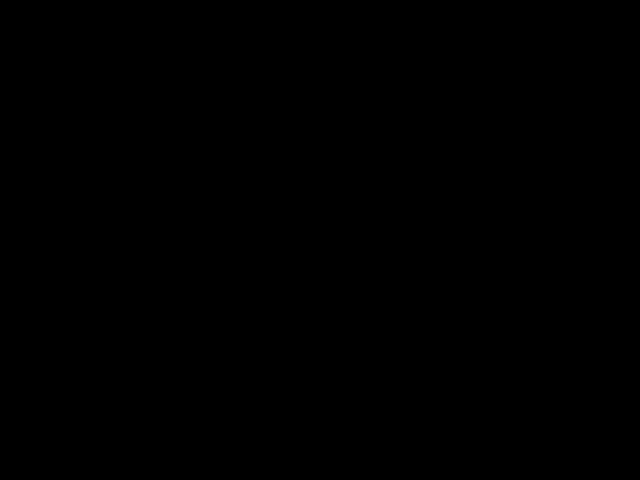


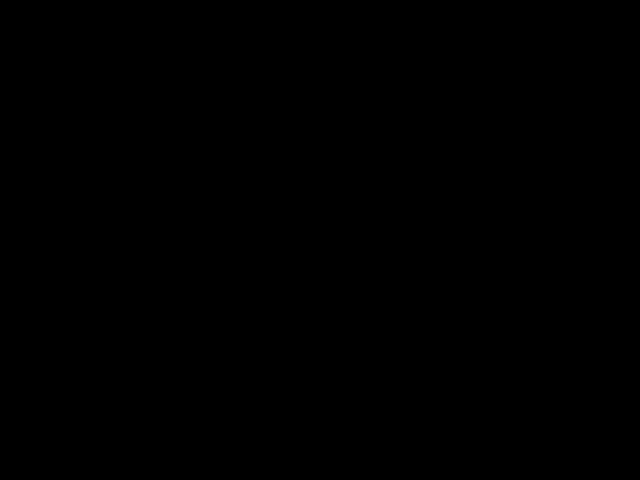


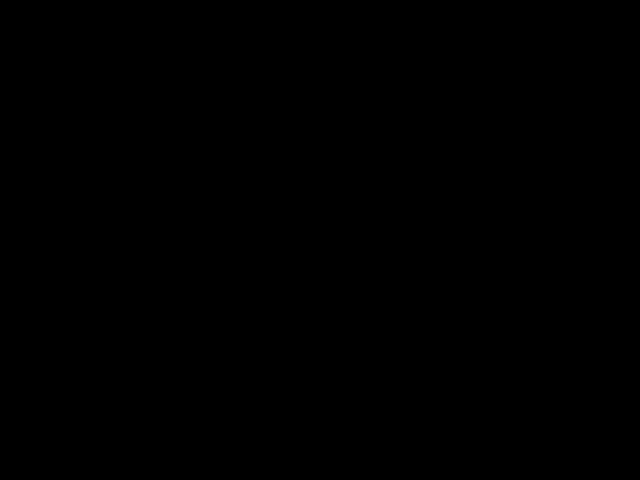


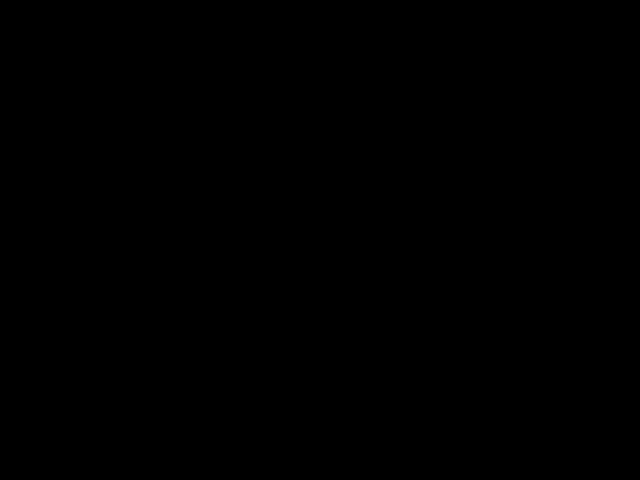


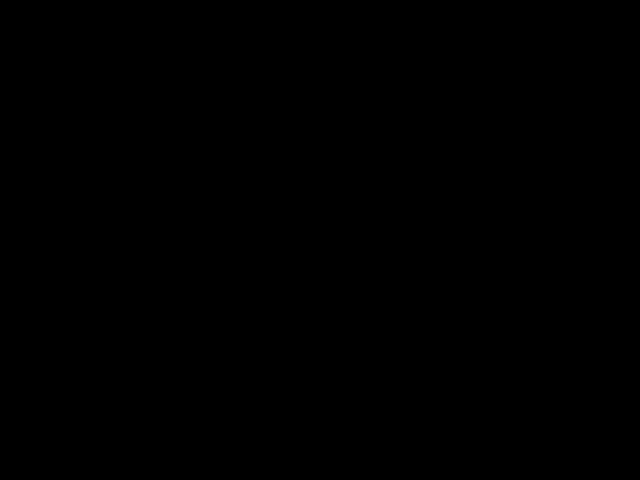


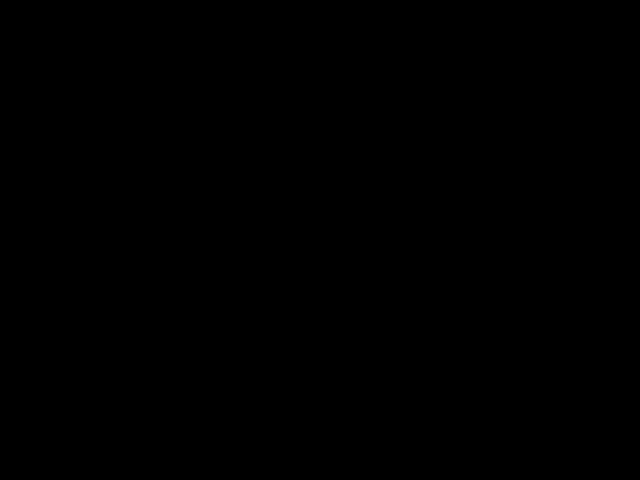


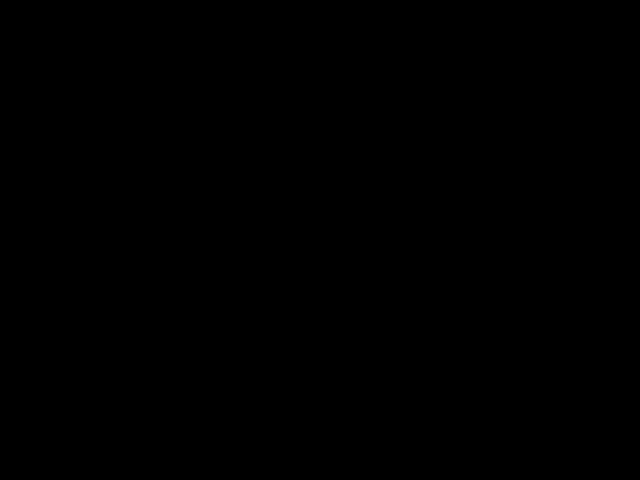


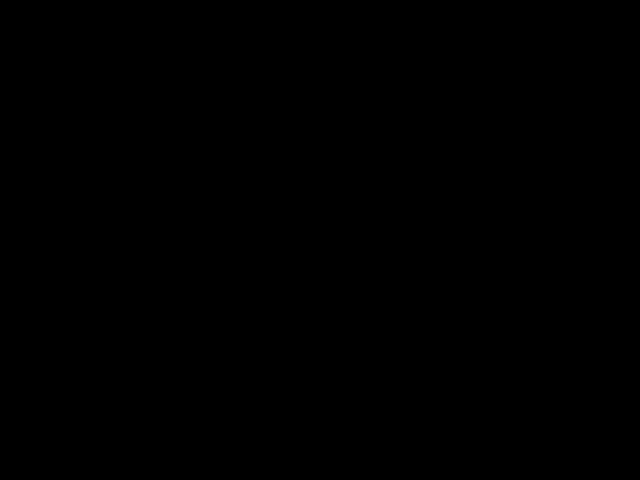


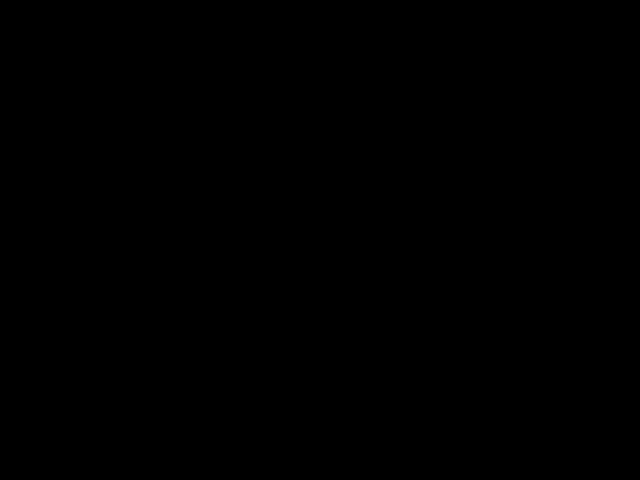


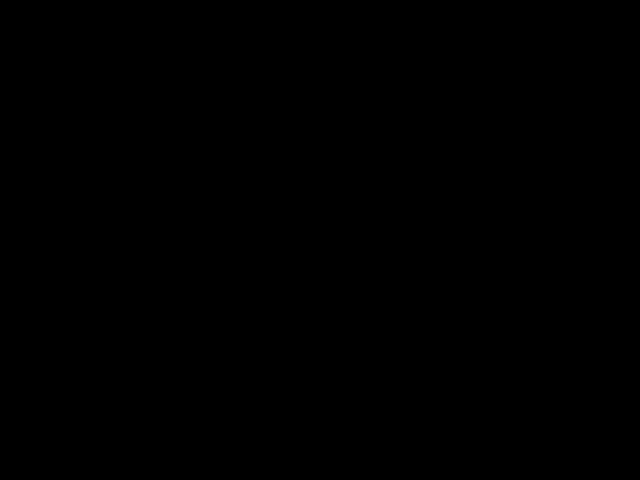


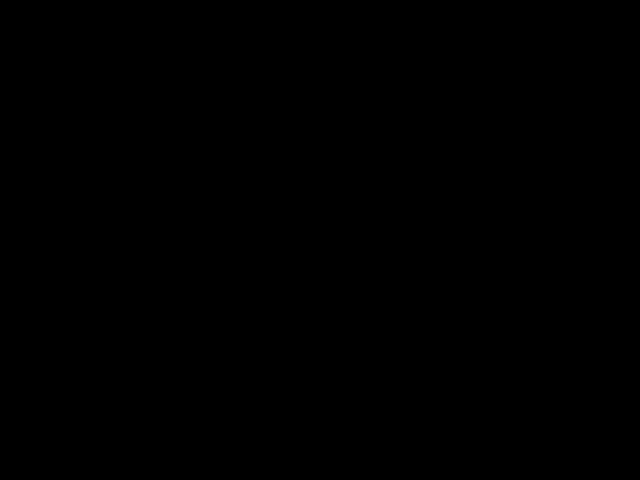


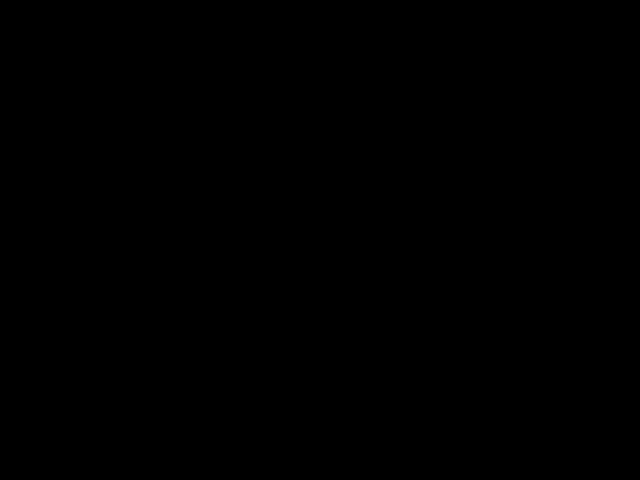


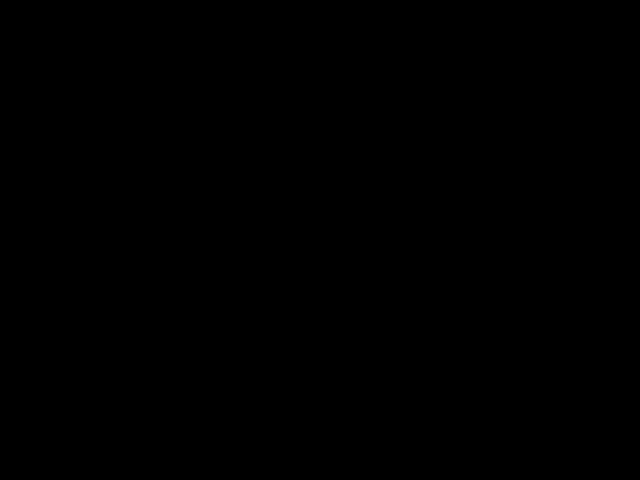


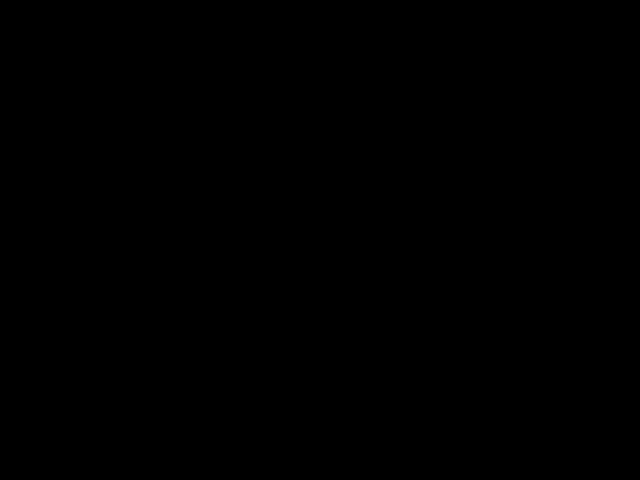


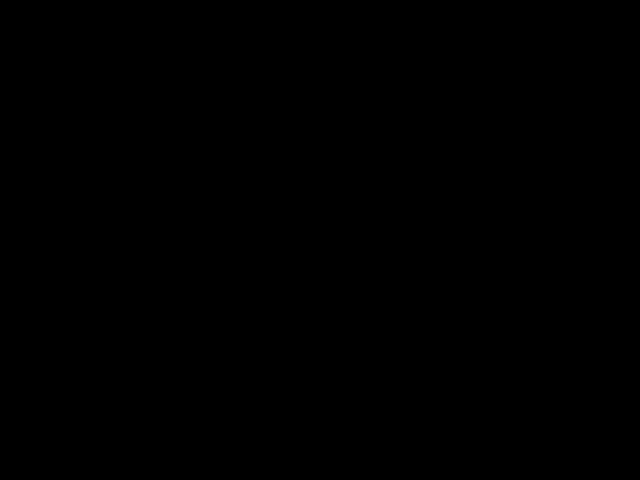


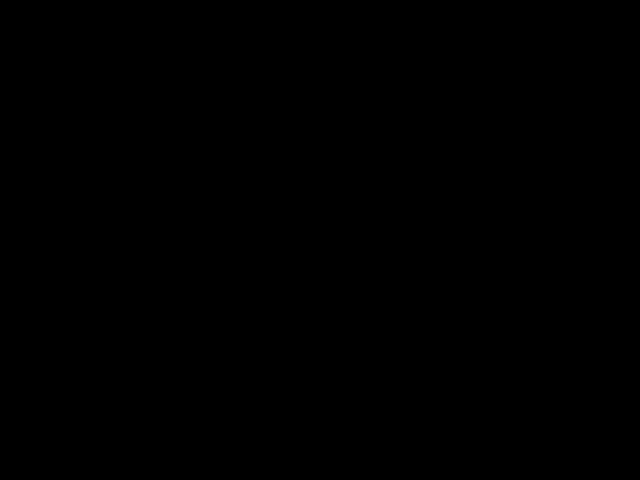


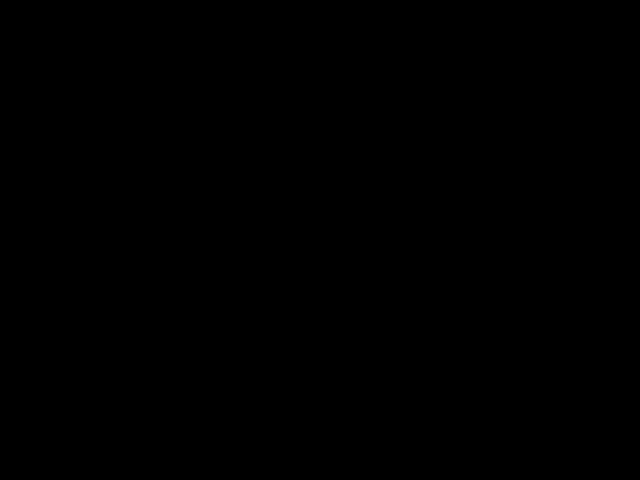


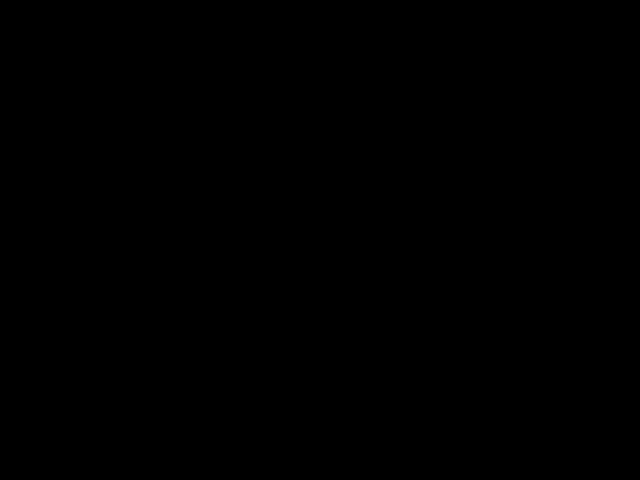


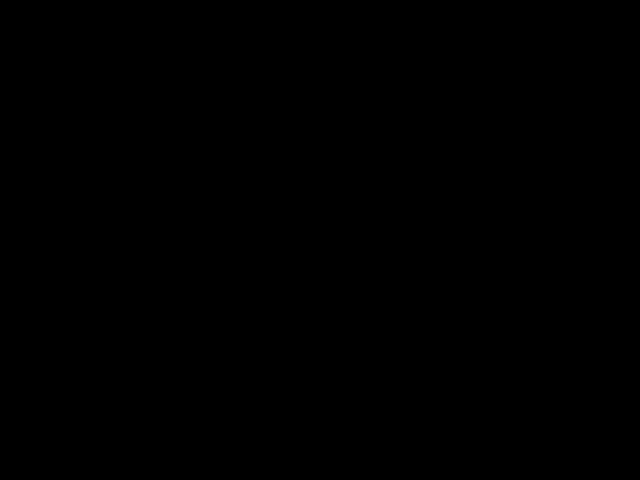


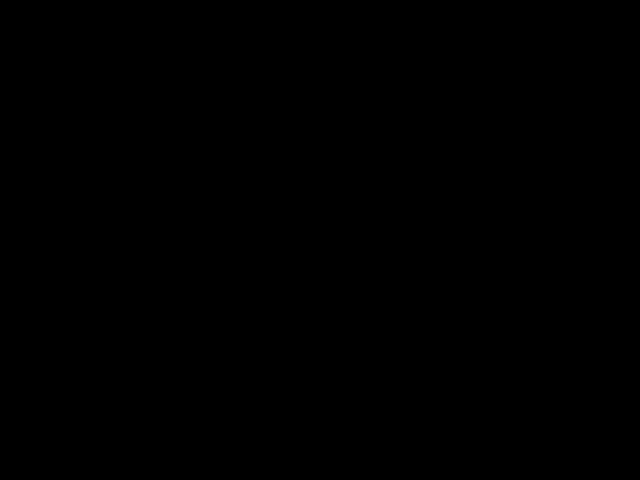


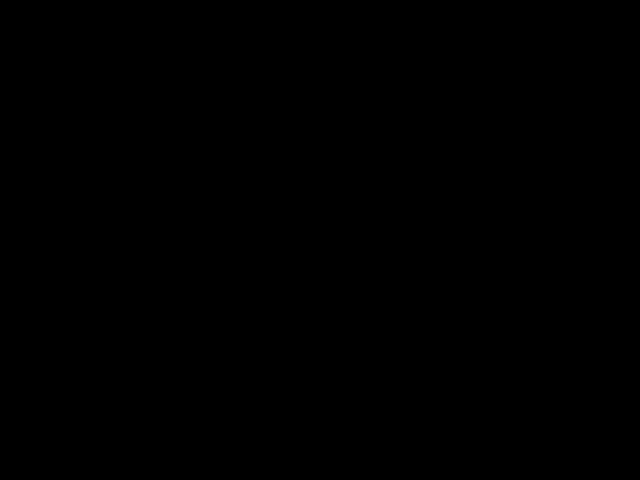


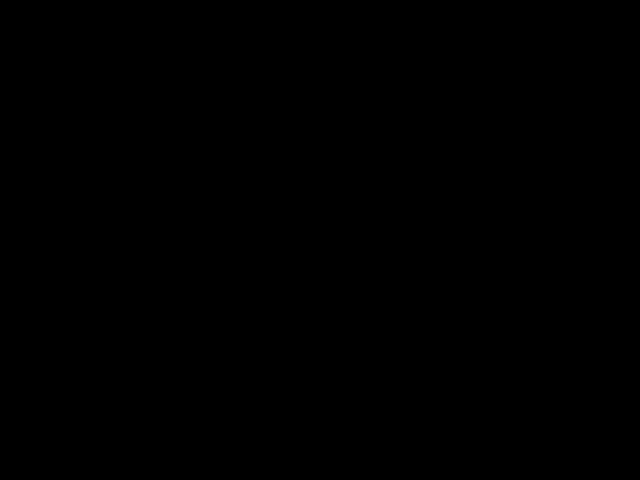


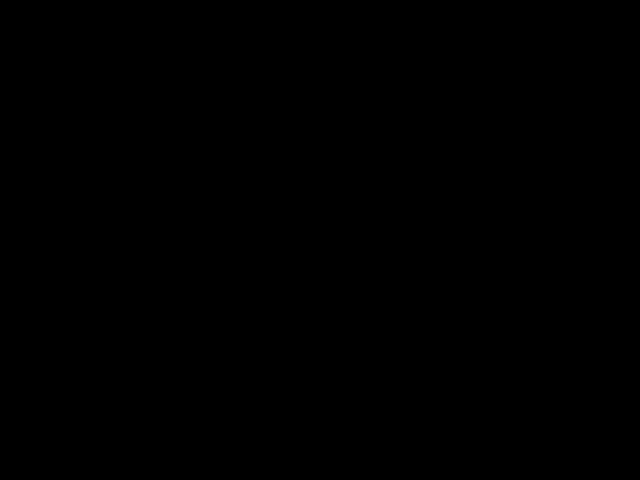


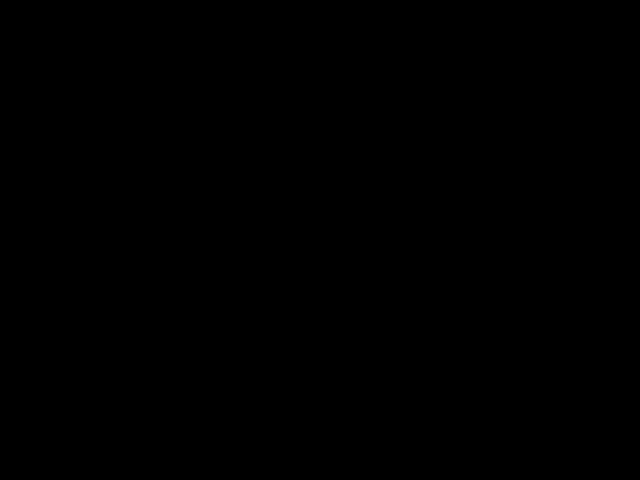


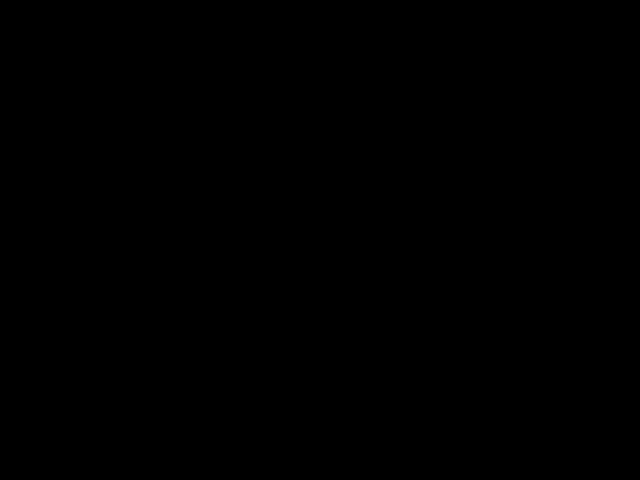


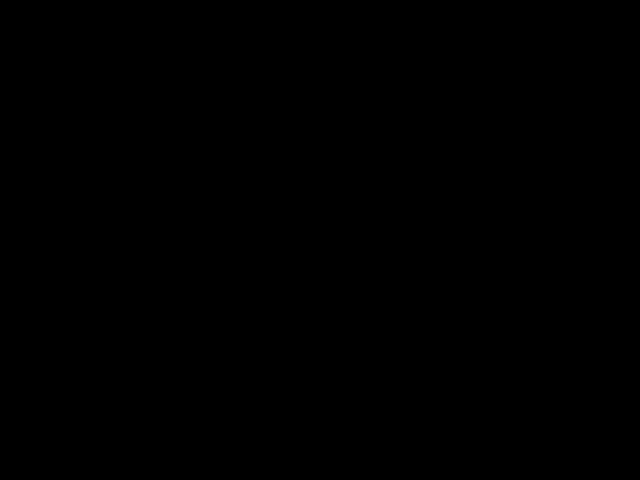


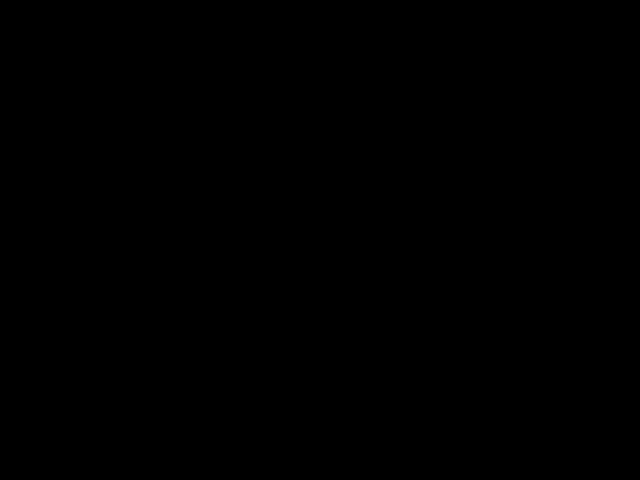


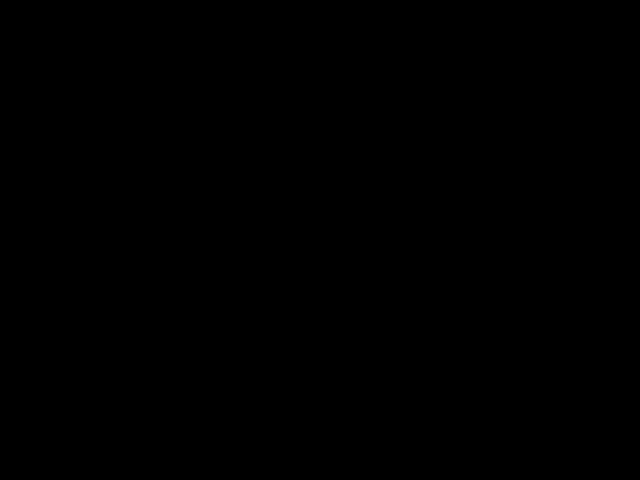


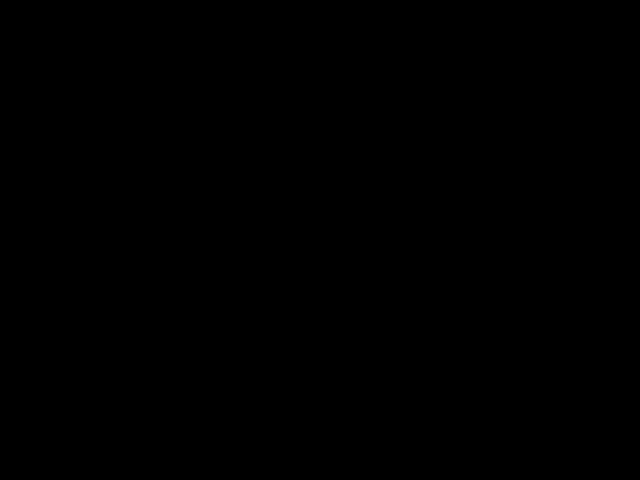


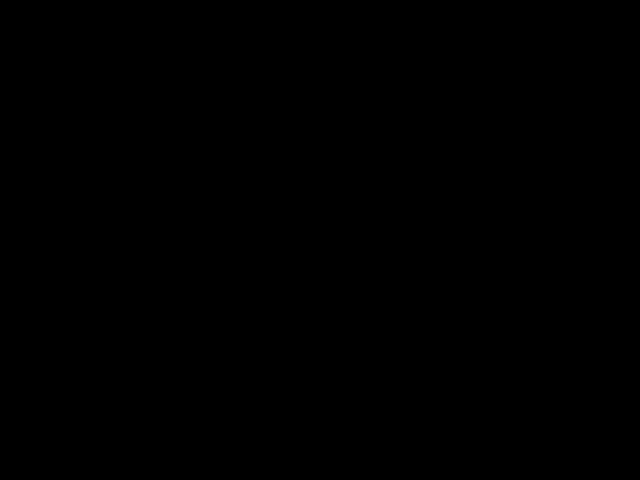


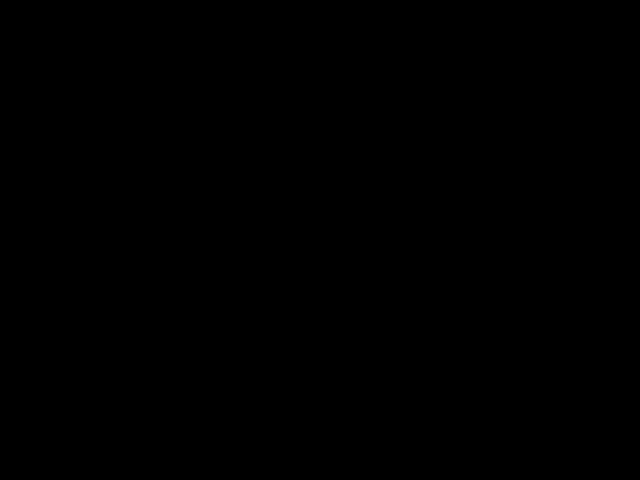


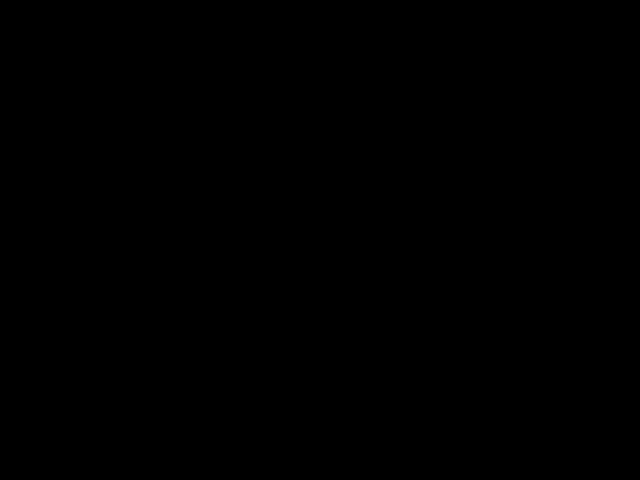

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step



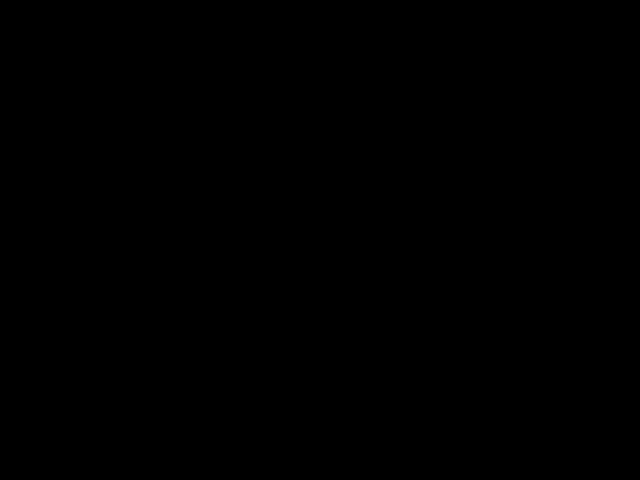


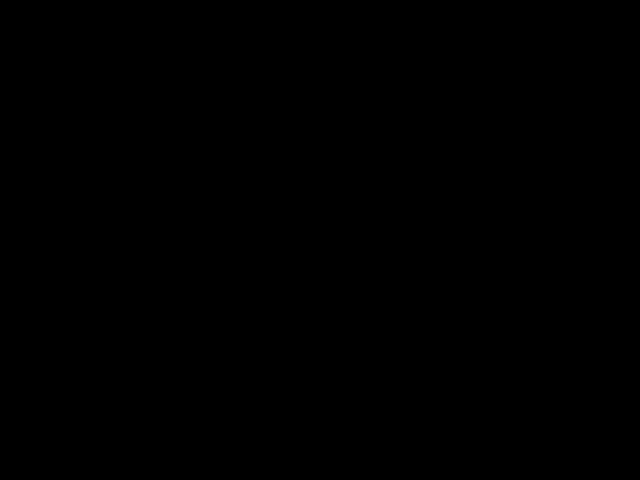


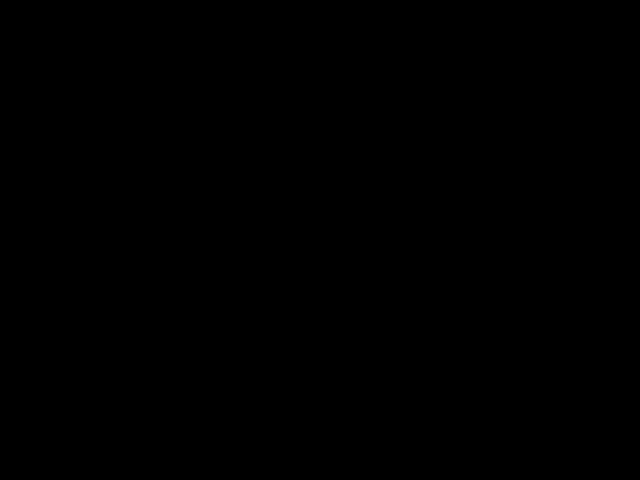


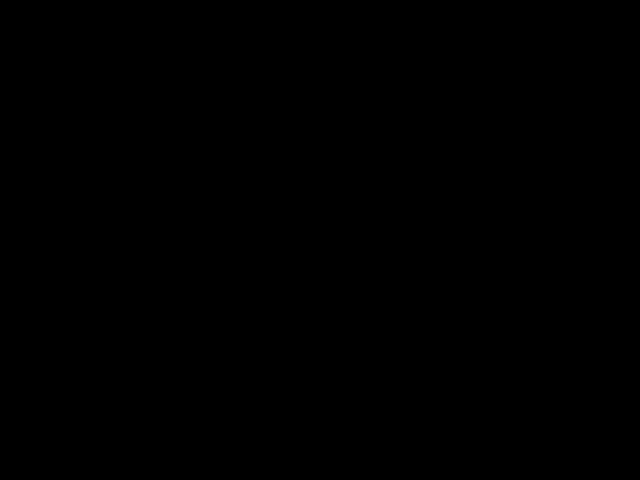


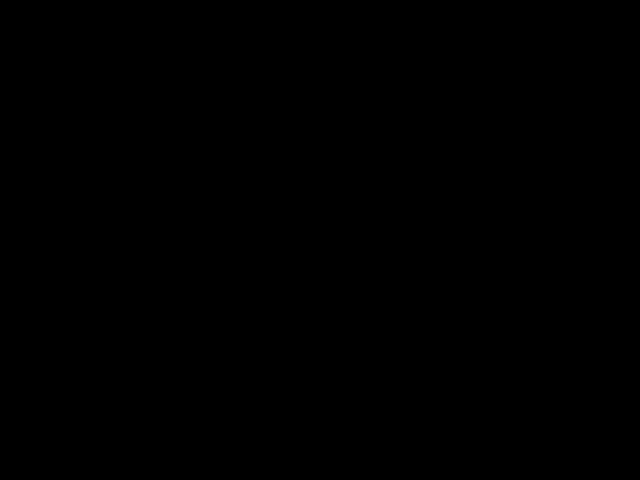


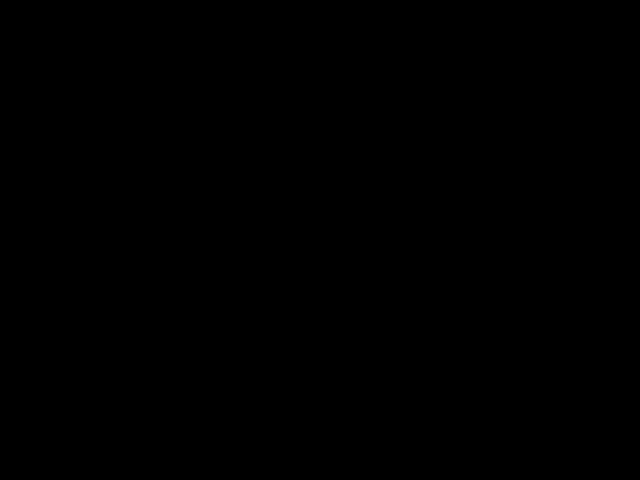


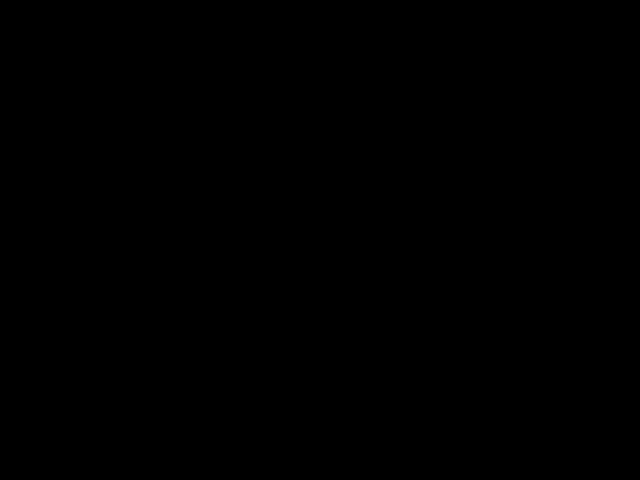

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step



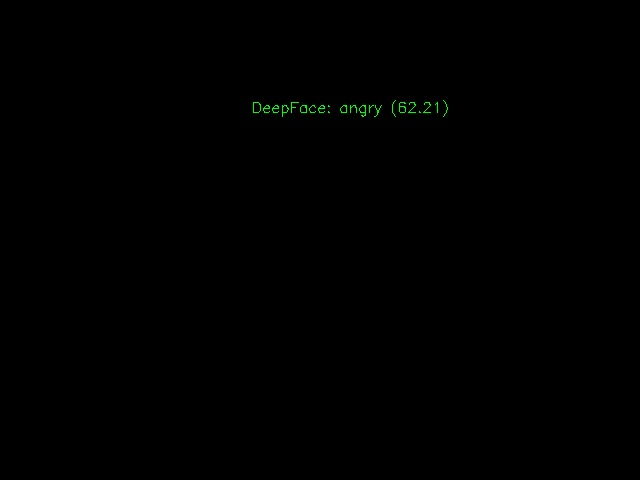


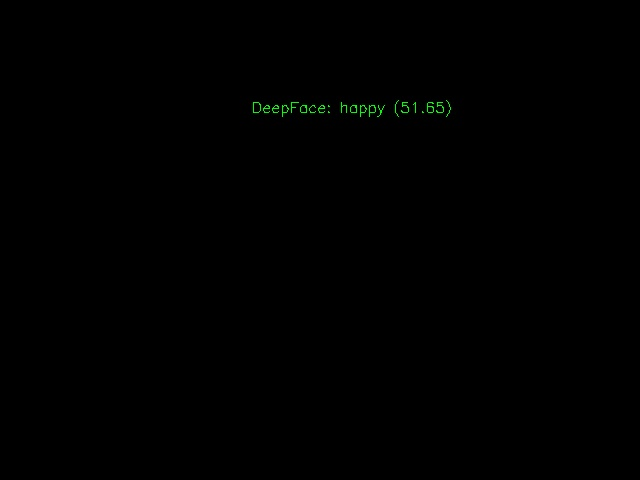


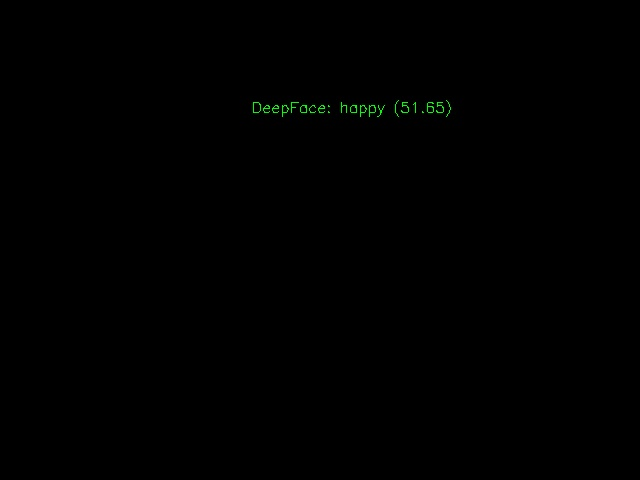


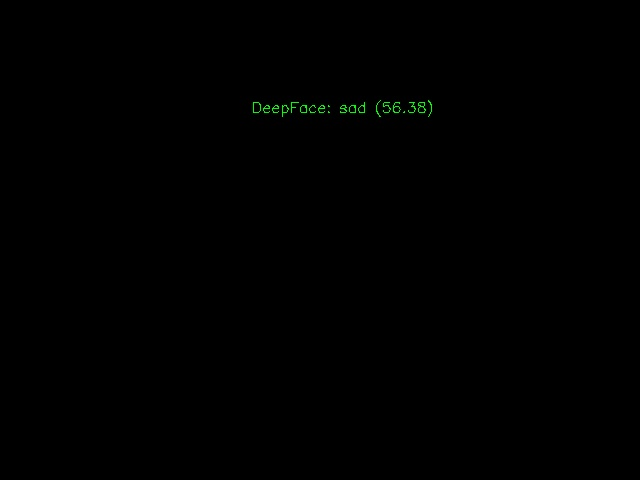

In [49]:
import threading
import time
import numpy as np
import cv2
from deepface import DeepFace
from tensorflow import keras
from keras.models import Sequential, model_from_json
import base64
from google.colab import output
from IPython.display import display, HTML

frame = None
is_frame_ready = False
model = keras.models.load_model("/content/drive/MyDrive/facialemotionmodel.h5")
haar_file = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)
labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0
def analyze_emotion_deepface(frame):
    try:
        emotion_analysis = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
        return emotion_analysis
    except Exception as e:
        print("Error during DeepFace emotion analysis:", e)
        return []
def capture_frames():
    global frame, is_frame_ready
    while True:
        if is_frame_ready:
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(frame, 1.3, 5)

            for (p, q, r, s) in faces:
                # Process face for the Keras model
                face_image = gray[q:q + s, p:p + r]
                face_image = cv2.resize(face_image, (48, 48))
                img = extract_features(face_image)
                pred = model.predict(img)
                prediction_label = labels[pred.argmax()]

                # Draw rectangle around face and add Keras model prediction
                cv2.rectangle(frame, (p, q), (p + r, q + s), (255, 0, 0), 2)
                cv2.putText(frame, '% s' % (prediction_label), (p - 10, q - 10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 0, 255))

                # Analyze emotion using DeepFace
                emotion_analysis = analyze_emotion_deepface(frame)
                if emotion_analysis:
                    analysis = emotion_analysis[0]
                    dominant_emotion = max(analysis['emotion'], key=analysis['emotion'].get)
                    confidence = analysis['emotion'][dominant_emotion]

                    # Display DeepFace emotion analysis
                    cv2.putText(frame, f'DeepFace: {dominant_emotion} ({confidence:.2f})', (p - 10, q - 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

            # Display the frame with Keras and DeepFace results
            _, imencoded = cv2.imencode('.jpg', frame)
            base64_image = base64.b64encode(imencoded).decode('utf-8')
            display(HTML(f'<img src="data:image/jpeg;base64,{base64_image}" width="600"/>'))
            time.sleep(0.1)  # Reduce the update rate to avoid overloading

# Function to receive and set the current frame from JavaScript
def receive_frame(dataURL):
    global frame, is_frame_ready
    # Decode the base64 image from JavaScript
    header, encoded = dataURL.split(',', 1)
    image_data = np.frombuffer(base64.b64decode(encoded), np.uint8)
    # Convert to BGR format
    frame = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
    is_frame_ready = True

# Register the function with the Python kernel
output.register_callback('notebook.run', receive_frame)

# Start the thread to capture frames
thread = threading.Thread(target=capture_frames)
thread.start()

# Display HTML and JavaScript for webcam
display(HTML('''
  <script>
    async function videoCapture() {
      const video = document.createElement('video');
      video.style.display = 'none';
      document.body.appendChild(video);
      const stream = await navigator.mediaDevices.getUserMedia({ video: true });
      video.srcObject = stream;
      await video.play();

      const canvas = document.createElement('canvas');
      const context = canvas.getContext('2d');
      canvas.width = 640;
      canvas.height = 480;

      function captureFrame() {
        context.drawImage(video, 0, 0, canvas.width, canvas.height);
        const dataURL = canvas.toDataURL('image/jpeg');
        google.colab.kernel.invokeFunction('notebook.run', [dataURL], {});
      }
      setInterval(captureFrame, 100);  // Capture frames every 100 ms
    }

    videoCapture();

  </script>
'''))





